In [333]:
!pip install openpyxl
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\Telco_customer_churn.xlsx")

In [334]:
df.head(10)

,CustomerID,Count,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,562,90003,327,1,0,0,0,2,...,0,1,3,53.85,157,1,1,86,3239,3
1,6511,1,562,90005,405,0,0,0,1,2,...,0,1,2,70.70,925,1,1,67,2701,13
2,6551,1,562,90006,393,0,0,0,1,8,...,0,1,2,99.65,6104,1,1,86,5372,13
3,5604,1,562,90010,410,0,0,1,1,28,...,0,1,2,104.80,2646,1,1,84,5003,13
4,174,1,562,90015,385,1,0,0,1,49,...,0,1,0,103.70,4265,1,1,89,5340,2
5,2937,1,562,90020,416,0,0,1,0,10,...,0,0,1,55.20,4416,1,1,78,5925,4
6,6207,1,562,90022,367,1,1,0,0,1,...,0,1,2,39.65,3340,1,1,100,5433,5
7,723,1,562,90024,415,1,0,0,0,1,...,0,0,3,20.15,1609,1,1,92,4832,3
8,4584,1,562,90028,447,1,0,1,1,47,...,0,1,2,99.35,4019,1,1,77,5789,2
9,6119,1,562,90029,440,1,0,1,0,1,...,0,0,2,30.20,2592,1,1,97,2915,2


In [231]:
df.tail(10)

,CustomerID,Count,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7033,593,1,1038,92277,519,0,0,0,0,2,...,0,1,3,20.05,3338,0,0,80,5191,20
7034,2521,1,1038,92278,611,1,1,1,0,55,...,1,0,1,60.00,2880,0,0,71,4212,20
7035,6875,1,1087,92281,78,1,0,0,0,38,...,0,1,1,69.50,2272,0,0,35,4591,20
7036,5995,1,1106,92283,57,1,0,0,0,19,...,0,1,0,78.70,892,0,0,20,2464,20
7037,5504,1,1127,92284,506,0,0,0,0,12,...,1,0,2,60.65,5741,0,0,24,3740,20
7038,1758,1,521,92285,587,0,0,0,0,72,...,2,1,0,21.15,770,0,0,45,5306,20
7039,4853,1,2,92301,636,1,0,1,1,24,...,1,1,3,84.80,1597,0,0,59,2140,20
7040,1525,1,22,92304,625,0,0,1,1,72,...,1,1,1,103.20,5698,0,0,71,5560,20
7041,3367,1,26,92305,512,0,0,1,1,11,...,0,1,2,29.60,2994,0,0,59,2793,20
7042,2226,1,32,92308,601,1,0,0,0,66,...,2,1,0,105.65,5407,0,0,38,5097,20


In [335]:
# we are checking for missing values in each column of the DataFrame and sums the total number of missing values per column. This could helps us to identify any gaps in the data.
print("Missing values in each column:\n", df.isnull().sum()) 

# replaces missing numerical values with the median of the respective columns
df.fillna(df.median(numeric_only=True), inplace=True)  


Missing values in each column:
 CustomerID           0
Count                0
City                 0
Zip Code             0
Lat Long             0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64


In [336]:
# convert all non-numeric columns to strings to ensure uniform data type for encoding
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype(str)

# handle missing values by filling with a placeholder if necessary
df.fillna("Missing", inplace=True)


In [337]:
encoder = LabelEncoder()   # which is used to convert categorical labels into numeric form.

for column in df.select_dtypes(include='object').columns:
    df[column] = encoder.fit_transform(df[column])

# Display encoded data
df.head()


,CustomerID,Count,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,562,90003,327,1,0,0,0,2,...,0,1,3,53.85,157,1,1,86,3239,3
1,6511,1,562,90005,405,0,0,0,1,2,...,0,1,2,70.70,925,1,1,67,2701,13
2,6551,1,562,90006,393,0,0,0,1,8,...,0,1,2,99.65,6104,1,1,86,5372,13
3,5604,1,562,90010,410,0,0,1,1,28,...,0,1,2,104.80,2646,1,1,84,5003,13
4,174,1,562,90015,385,1,0,0,1,49,...,0,1,0,103.70,4265,1,1,89,5340,2


In [77]:
# Drop unnecessary columns that will interrupt our process 
columns_to_drop = ['Longitude', 'Latitude', 'Country', 'State']  
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')



In [338]:
# we have generated summary statistics for numerical features. This is basically raw information of dataset
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
         CustomerID   Count         City      Zip Code     Lat Long  \
count  7043.000000  7043.0  7043.000000   7043.000000  7043.000000   
mean   3521.000000     1.0   593.713616  93521.964646   793.535567   
std    2033.283305     0.0   314.990288   1865.794555   480.597035   
min       0.000000     1.0     0.000000  90001.000000     0.000000   
25%    1760.500000     1.0   337.000000  92102.000000   376.000000   
50%    3521.000000     1.0   601.000000  93552.000000   771.000000   
75%    5281.500000     1.0   869.000000  95351.000000  1211.000000   
max    7042.000000     1.0  1128.000000  96161.000000  1651.000000   

            Gender  Senior Citizen      Partner   Dependents  Tenure Months  \
count  7043.000000     7043.000000  7043.000000  7043.000000    7043.000000   
mean      0.504756        0.162147     0.483033     0.231010      32.371149   
std       0.500013        0.368612     0.499748     0.421508      24.559481   
min       0.000000        0.0000

In [388]:
# lets display all column names before processing further features
print("Column names in the DataFrame\n:", df.columns)
print("\nAs we can see we have above cleaned and normalized columns so we can proceed further actions")


Column names in the DataFrame
: Index(['CustomerID', 'Count', 'City', 'Zip Code', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

As we can see we have above cleaned and normalized columns so we can proceed further actions


Let's make Visualizations through Map

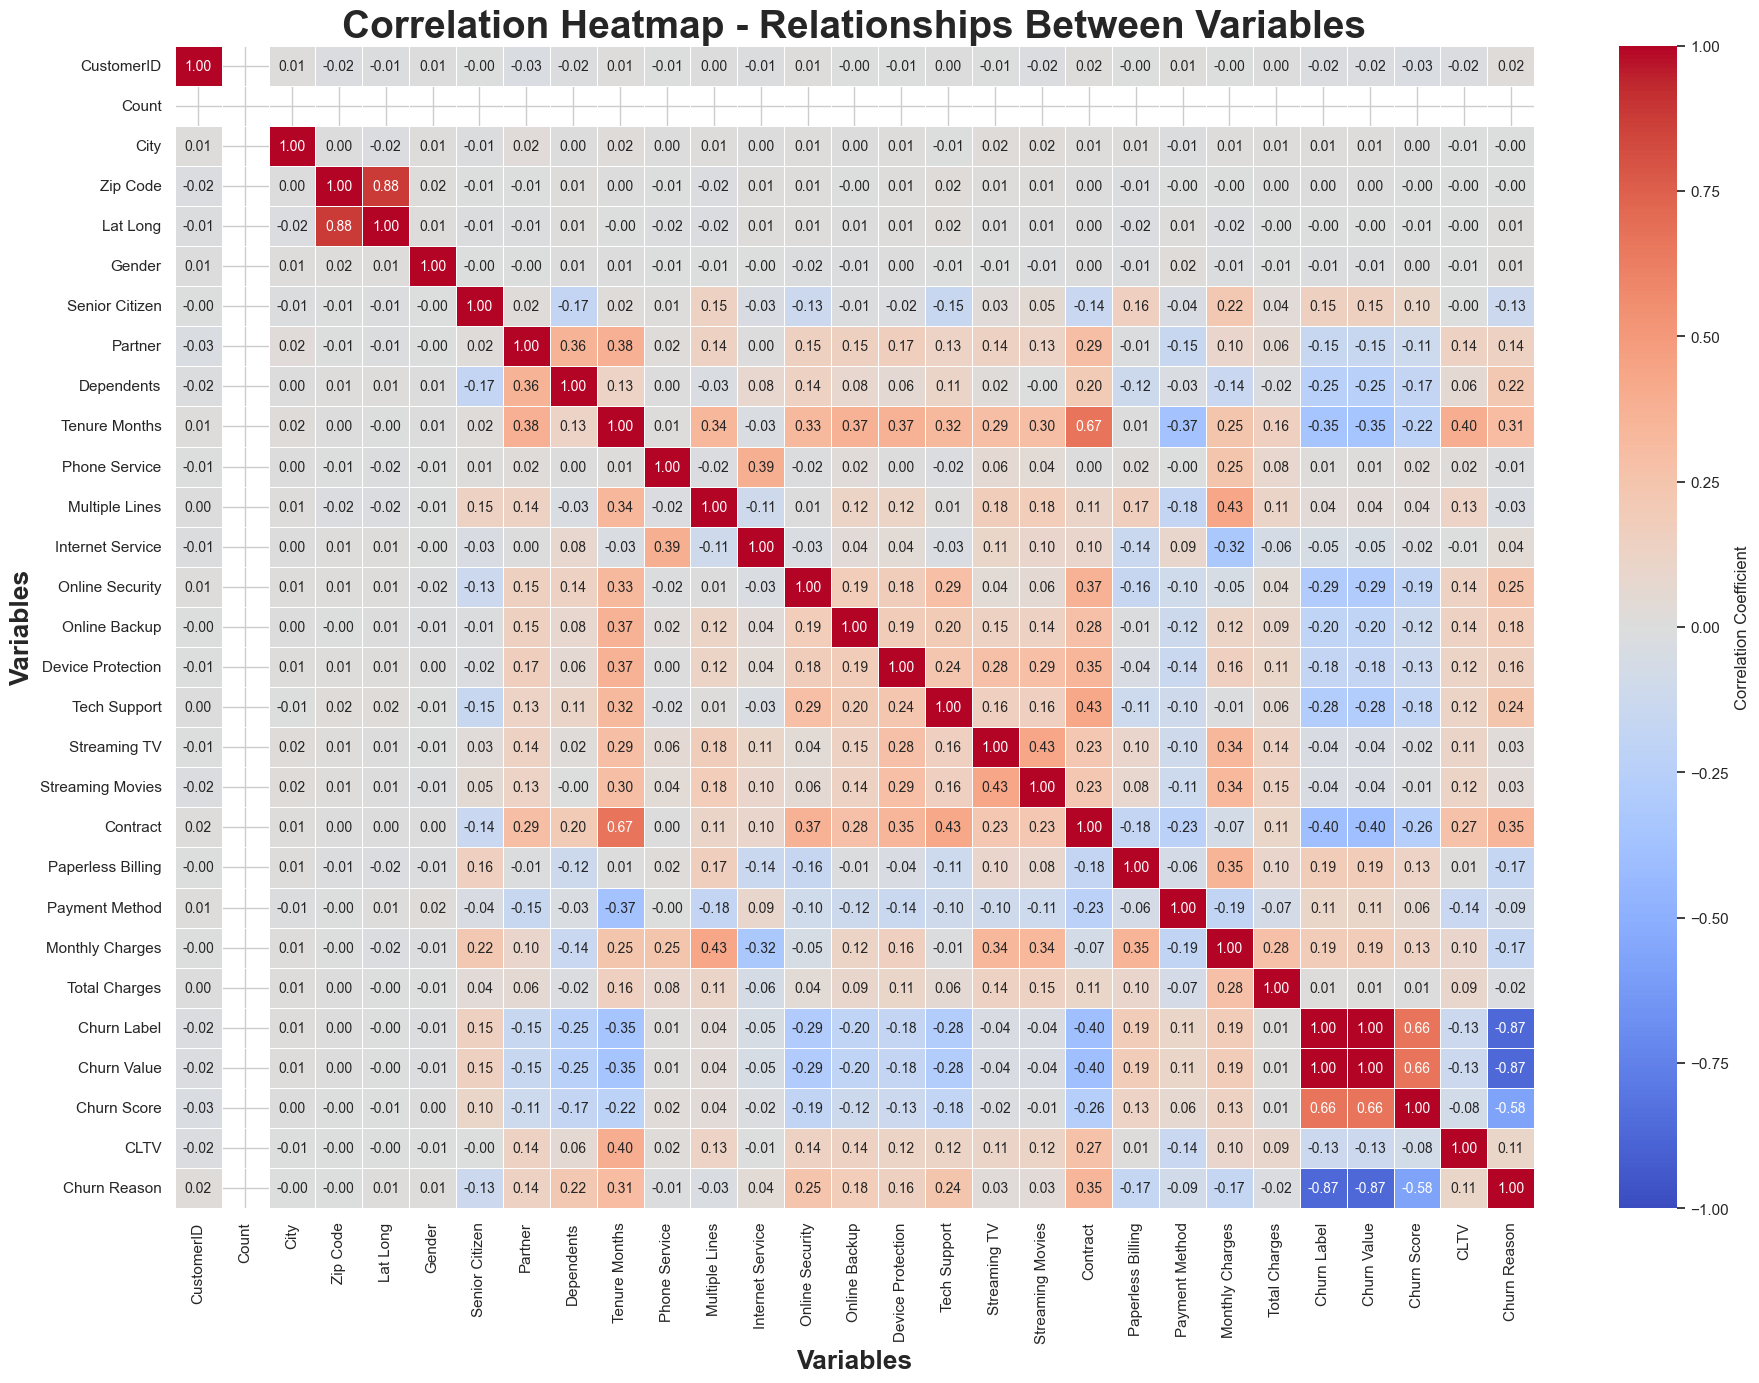

In [389]:
def plot_heatmap(df):
    # Set the figure size and style
    plt.figure(figsize=(19, 14))
    sns.set(style="whitegrid")

    # we have computed correlation matrix for numerical columns
    corr_matrix = df.corr()

    # here we plot the heatmap with more details for better representation
    ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 10}, 
                     cbar_kws={'label': 'Correlation Coefficient'}, center=0, vmin=-1, vmax=1)

    plt.title('Correlation Heatmap - Relationships Between Variables', fontsize=28, fontweight='bold')

    # labeling the axes
    plt.xlabel('Variables', fontsize=19, fontweight='bold')
    plt.ylabel('Variables', fontsize=19, fontweight='bold')

    
    # adjusts the layout to prevent overlap and ensure that all plot elements fit well.
    plt.tight_layout()

    # Show the plot
    plt.show()

# calling the function with our dataframe
plot_heatmap(df)


<Figure size 400x1900 with 0 Axes>

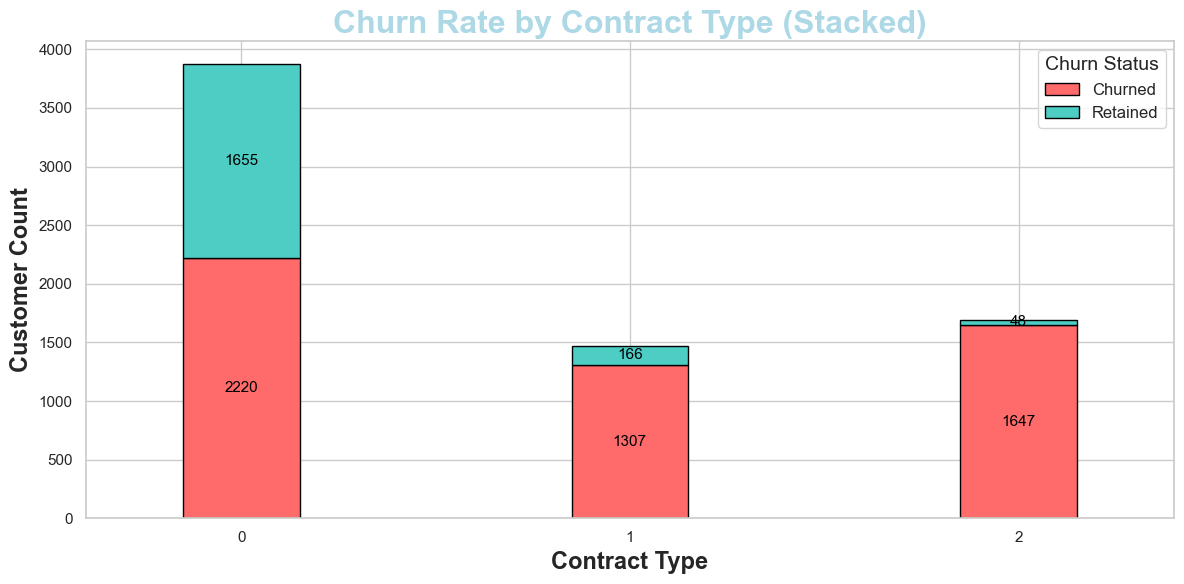

In [308]:
contract_churn = df.groupby(['Contract', 'Churn Value'])['CustomerID'].count().unstack()

# Set the plot size and style
plt.figure(figsize=(4, 19))
sns.set(style="whitegrid")

# Plot a stacked bar chart
contract_churn.plot(kind='bar', stacked=True, color=["#FF6B6B", "#4ECDC4"], edgecolor='black', width=0.3, figsize=(12, 6))

# adding title and axis labels with styling
plt.title('Churn Rate by Contract Type (Stacked)', fontsize=23, fontweight='bold', color='lightblue')
plt.xlabel('Contract Type', fontsize=17, fontweight='bold')
plt.ylabel('Customer Count', fontsize=17, fontweight='bold')

# adding legend
plt.legend(['Churned', 'Retained'], title='Churn Status', fontsize=12, title_fontsize=14)

# we have kept rotation x-axis labels for better readability
plt.xticks(rotation=0)

# Add value annotations on each stack
for i, bar_stack in enumerate(plt.gca().containers):
    for bar in bar_stack:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center', va='center', fontsize=11, color='black', fontweight='normal'
            )

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14060\184350650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Payment Method', y='Monthly Charges', data=df, palette='coolwarm', linewidth=2.5)


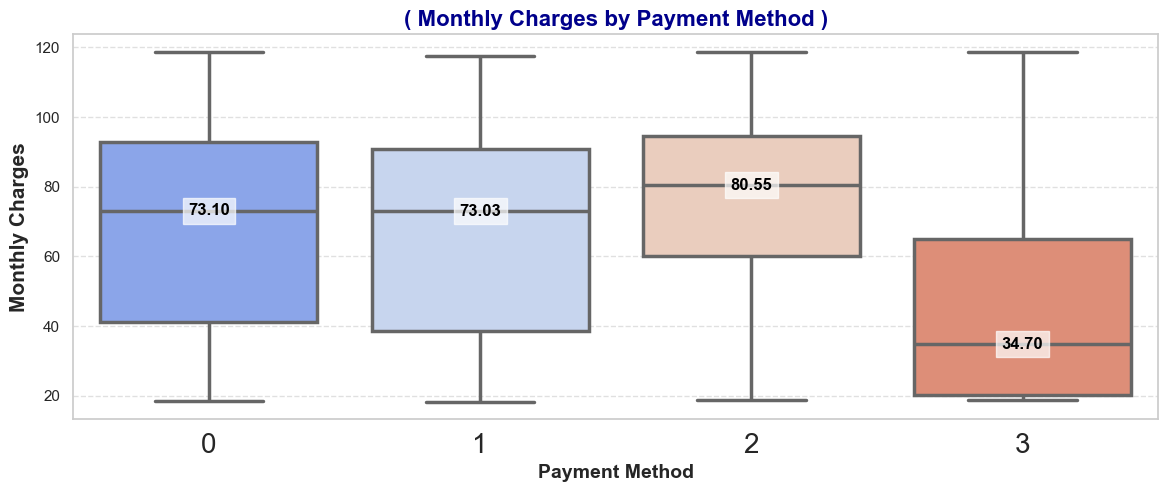

In [232]:
sns.set_theme(style="whitegrid", palette="muted")

# created the boxplot with enhancements
plt.figure(figsize=(14, 5))
boxplot = sns.boxplot(x='Payment Method', y='Monthly Charges', data=df, palette='coolwarm', linewidth=2.5)

# adding title and axis labels with formatting
plt.title('( Monthly Charges by Payment Method )', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=15, fontweight='bold')

# rotate x-axis labels for readability
plt.xticks(rotation=0, fontsize=20)

# adding annotations for median values
medians = df.groupby('Payment Method')['Monthly Charges'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', ha='center', va='center', fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7))

# show gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# displays our plot
plt.show()

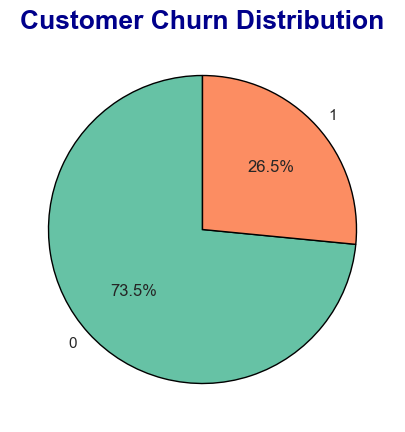

In [128]:
# Aggregate the churn counts
churn_counts = df['Churn Label'].value_counts()

# creating the pie chart
plt.figure(figsize=(11, 5))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62'],  # customized attractive colors
    wedgeprops={'edgecolor': 'black'}  # added edge color for clarity
)

# added title
plt.title('Customer Churn Distribution', fontsize=19, fontweight='bold', color='darkblue')

plt.show()


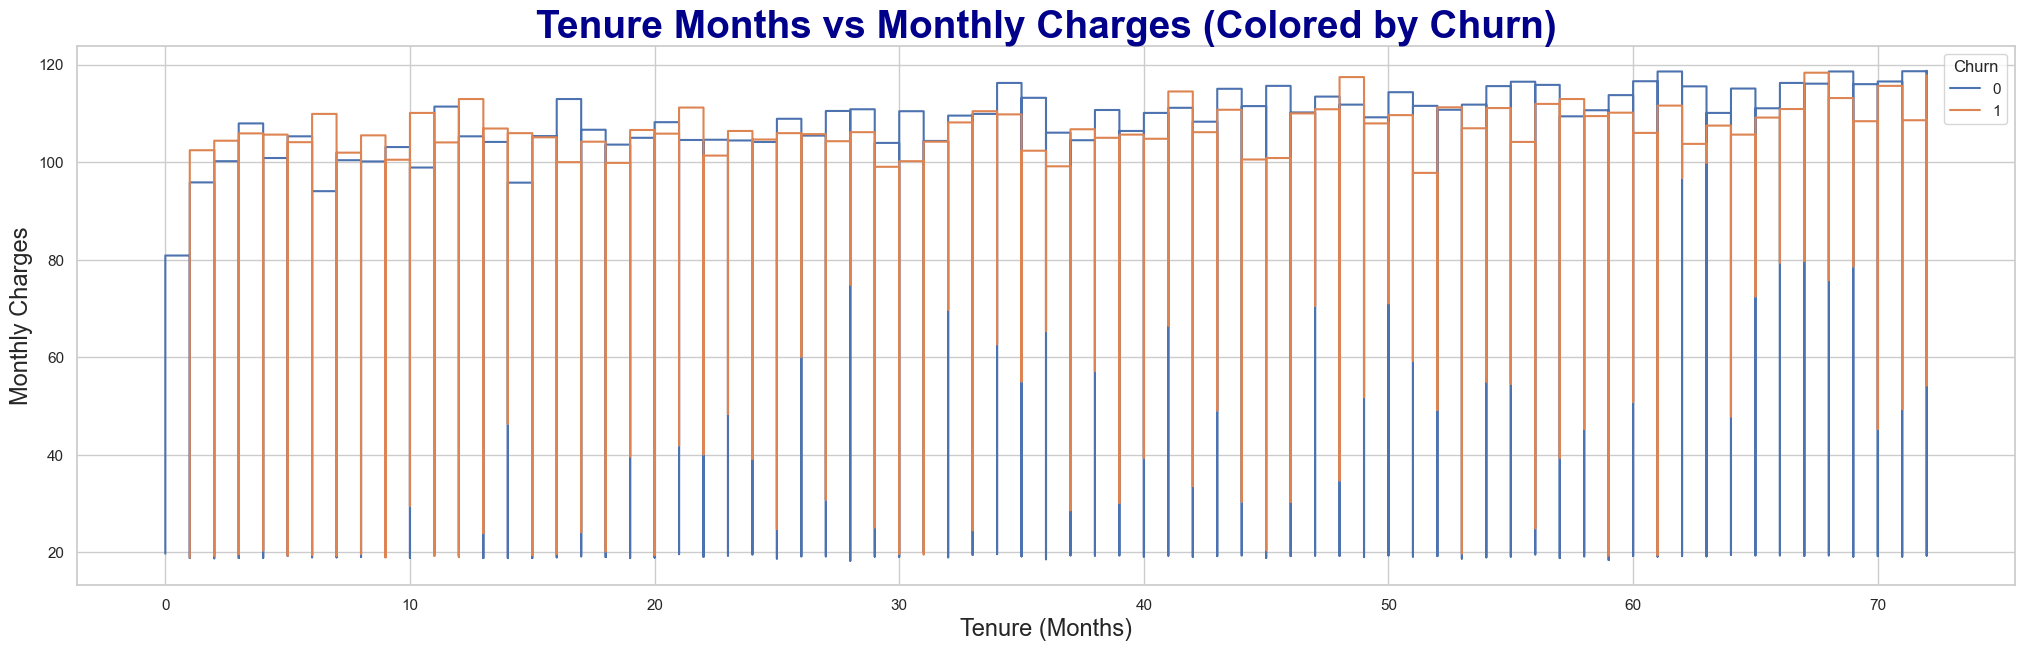

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))

sns.lineplot(
    data=df,
    x='Tenure Months',
    y='Monthly Charges',
    hue='Churn Label',
    estimator=None,          
    drawstyle='steps-post', 
)

plt.title('Tenure Months vs Monthly Charges (Colored by Churn)', fontsize=28, fontweight='bold', color='darkblue')
plt.xlabel('Tenure (Months)', fontsize=17)
plt.ylabel('Monthly Charges', fontsize=17)
plt.legend(title='Churn')
plt.grid(True)
plt.show()


In [390]:
# lets check if our columns are still changed as we have used inplace feature
print(df.columns)


Index(['CustomerID', 'Count', 'City', 'Zip Code', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


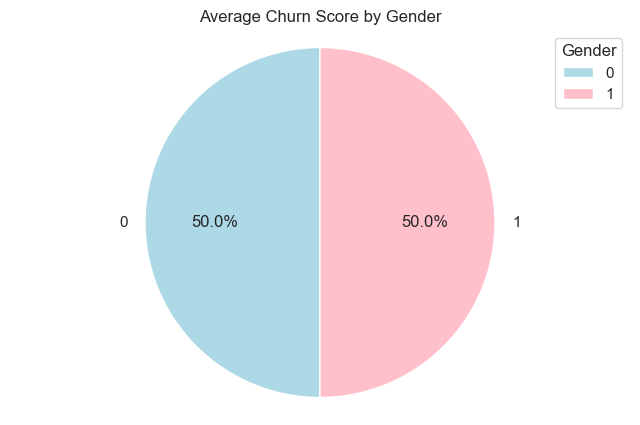

In [391]:
# group by Gender and calculate the average churn score
gender_churn_score = df.groupby('Gender')['Churn Score'].mean()

# plotting a pie chart
plt.figure(figsize=(8, 5))
plt.pie(gender_churn_score, labels=gender_churn_score.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# adding legend and title
plt.title('Average Churn Score by Gender')
plt.legend(gender_churn_score.index, title='Gender', loc='upper right')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is a circle
plt.show()


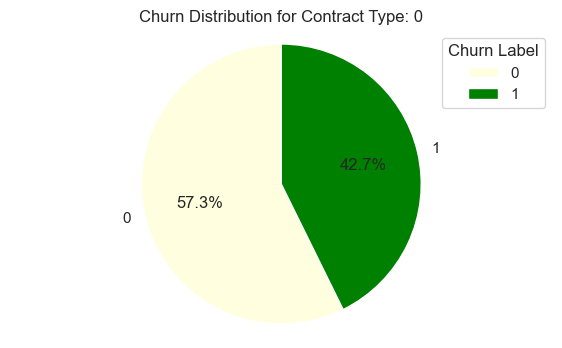

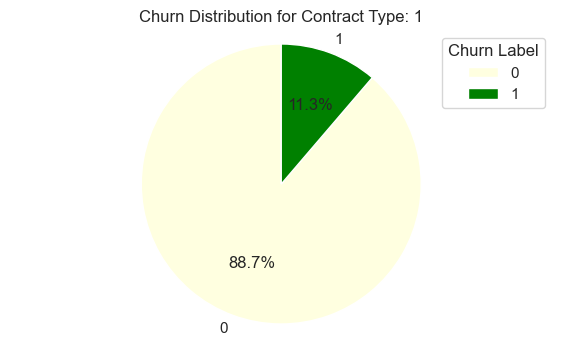

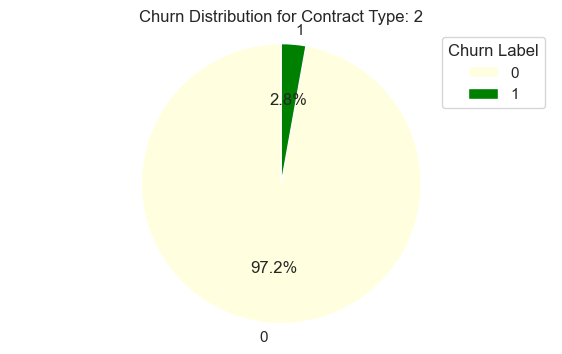

In [369]:
# let's create another pie chart visualization using 'Contract' and 'Churn Label this will show the churn distribution by contract type

# we group by Contract type and calculate churn percentage
contract_churn_distribution = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()

# plotting a pie chart for each contract type's churn distribution
for contract_type in contract_churn_distribution.index:
    plt.figure(figsize=(7, 4))
    plt.pie(contract_churn_distribution.loc[contract_type], labels=contract_churn_distribution.columns, autopct='%1.1f%%', startangle=90, colors=['lightyellow', 'green'])
    plt.title(f'Churn Distribution for Contract Type: {contract_type}')
    plt.axis('equal')
    plt.legend(contract_churn_distribution.columns, title='Churn Label', loc='upper right')
    plt.show()



In [392]:
# displaying unique values in the 'Churn Label' column to diagnose the issue
unique_churn_values = df['Churn Label'].unique()
unique_churn_values


array([1, 0])

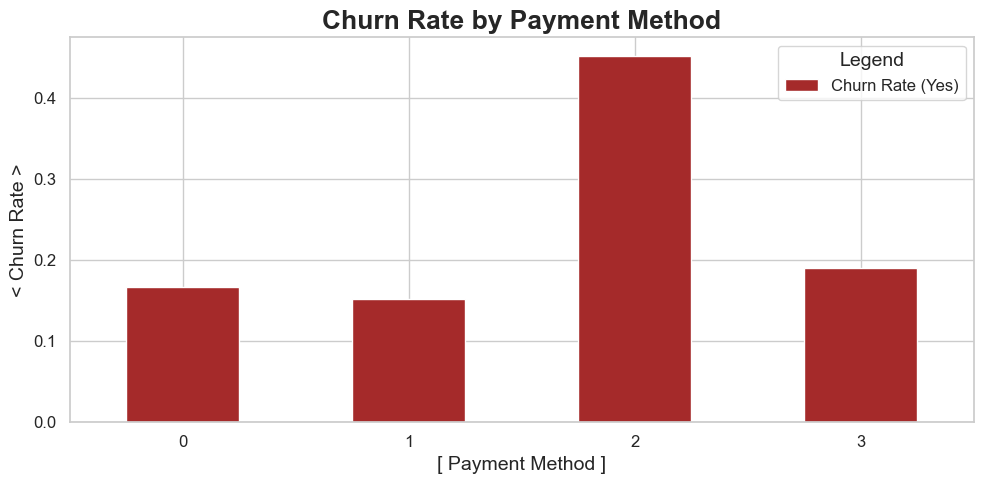

In [371]:
# calculate churn rate by payment method
payment_churn_rate = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()

# plotting the churn rate for customers who churned ('Yes')
plt.figure(figsize=(10, 5))
payment_churn_rate[1].plot(kind='bar', color='brown')

plt.title('Churn Rate by Payment Method', fontsize=19, fontweight='bold')
plt.xlabel('[ Payment Method ]', fontsize=14)
plt.ylabel('< Churn Rate >', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# add legend
plt.legend(['Churn Rate (Yes)'], title='Legend', fontsize=12, title_fontsize=14, loc='upper right')

plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()


In [393]:
missing_values = df.isnull().sum()


In [394]:
df_cleaned = df.fillna(df.median(numeric_only=True))


In [395]:
remaining_missing_values = df_cleaned.isnull().sum()


In [401]:
print("\nAs shown in the below, we have zero null values in our dataset as we have done clening and dropped missing values")
missing_values, remaining_missing_values



As shown in the below, we have zero null values in our dataset as we have done clening and dropped missing values


(CustomerID           0
 Count                0
 City                 0
 Zip Code             0
 Lat Long             0
 Gender               0
 Senior Citizen       0
 Partner              0
 Dependents           0
 Tenure Months        0
 Phone Service        0
 Multiple Lines       0
 Internet Service     0
 Online Security      0
 Online Backup        0
 Device Protection    0
 Tech Support         0
 Streaming TV         0
 Streaming Movies     0
 Contract             0
 Paperless Billing    0
 Payment Method       0
 Monthly Charges      0
 Total Charges        0
 Churn Label          0
 Churn Value          0
 Churn Score          0
 CLTV                 0
 Churn Reason         0
 dtype: int64,
 CustomerID           0
 Count                0
 City                 0
 Zip Code             0
 Lat Long             0
 Gender               0
 Senior Citizen       0
 Partner              0
 Dependents           0
 Tenure Months        0
 Phone Service        0
 Multiple Lines       0
 

In [376]:
encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [377]:
# splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5634, 28)
Testing set size: (1409, 28)


In [378]:
# we are training Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test)


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
# training Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# making predictions
tree_preds = tree_model.predict(X_test)


In [402]:
# Evaluate Logistic Regression model
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, log_reg_preds),
    'Precision': precision_score(y_test, log_reg_preds),
    'Recall': recall_score(y_test, log_reg_preds),
    'F1 Score': f1_score(y_test, log_reg_preds)
}

# printing the evaluation metrics for the Logistic Regression model
print("Logistic Regression Metrics:\n", log_reg_metrics)
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, log_reg_preds))  # displayed confusion matrix for Logistic Regression to understand the classification performance in detail
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, log_reg_preds))  # displayed classification report for Logistic Regression, including precision, recall, and F1 for each class


# evaluatng Decision Tree model
tree_metrics = {
    'Accuracy': accuracy_score(y_test, tree_preds),
    'Precision': precision_score(y_test, tree_preds),
    'Recall': recall_score(y_test, tree_preds),
    'F1 Score': f1_score(y_test, tree_preds)
}

print("Decision Tree Metrics:\n", tree_metrics)
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, tree_preds))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, tree_preds))


Logistic Regression Metrics:
 {'Accuracy': 0.9205110007097232, 'Precision': np.float64(0.86), 'Recall': np.float64(0.86), 'F1 Score': np.float64(0.86)}

Confusion Matrix (Logistic Regression):
 [[953  56]
 [ 56 344]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1009
           1       0.86      0.86      0.86       400

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Decision Tree Metrics:
 {'Accuracy': 1.0, 'Precision': np.float64(1.0), 'Recall': np.float64(1.0), 'F1 Score': np.float64(1.0)}

Confusion Matrix (Decision Tree):
 [[1009    0]
 [   0  400]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy 

In [406]:
import pandas as pd

# define prediction function with missing value handling
def predict_churn(input_data, model):
    # Convert input data to DataFrame and ensure all columns match the training features
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # fill any missing values with the median of training data
    input_df = input_df.fillna(X.median())

    # making the prediction
    prediction = model.predict(input_df)

    # if the prediction is 1, the customer is predicted to churn; otherwise, they are predicted to stay
    if prediction[0] == 1:
        return "Prediction: The customer is likely to churn."
    else:
        return "Prediction: The customer is likely to stay."


In [407]:
# printing the columns used in the model
print("Model features:", X.columns)


Model features: Index(['CustomerID', 'Count', 'City', 'Zip Code', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


Prediction: The customer is likely to stay.


In [409]:
#!/usr/bin/env python3

def print_banner():
    banner = "=" * 60
    print(banner)
    print("Welcome to the Churn Prediction System".center(60))
    print(banner)
    print("Please provide the following customer information.\n"
          "For each prompt, please follow the instructions carefully.\n")

def get_valid_int(prompt, allowed_values=None):
    """
    Prompt the user for an integer input.
    If allowed_values is provided, the input must be one of them.
    """
    while True:
        try:
            value = int(input(prompt))
            if allowed_values is not None and value not in allowed_values:
                print(f"  --> Invalid input. Allowed values: {allowed_values}\n")
                continue
            return value
        except ValueError:
            print("  --> Invalid input. Please enter a valid integer.\n")

def get_valid_float(prompt):
    """
    Prompt the user for a floating-point number.
    """
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("  --> Invalid input. Please enter a valid number.\n")

def get_user_input():
    """
    Collects and returns user input as a dictionary after prompting for each field.
    """
    input_data = {}
    print_banner()
    
    # Demographic and account details
    input_data['Gender'] = get_valid_int("Enter Gender (0 for Male, 1 for Female): ", allowed_values=[0, 1])
    input_data['Senior Citizen'] = get_valid_int("Enter Senior Citizen (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Partner'] = get_valid_int("Enter Partner (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Dependents'] = get_valid_int("Enter Dependents (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Tenure Months'] = get_valid_int("Enter Tenure (in months): ")
    
    # Service details
    input_data['Phone Service'] = get_valid_int("Enter Phone Service (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Multiple Lines'] = get_valid_int("Enter Multiple Lines (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Internet Service'] = get_valid_int("Enter Internet Service (0=No, 1=DSL, 2=Fiber optic): ", allowed_values=[0, 1, 2])
    input_data['Online Security'] = get_valid_int("Enter Online Security (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Online Backup'] = get_valid_int("Enter Online Backup (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Device Protection'] = get_valid_int("Enter Device Protection (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Tech Support'] = get_valid_int("Enter Tech Support (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Streaming TV'] = get_valid_int("Enter Streaming TV (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Streaming Movies'] = get_valid_int("Enter Streaming Movies (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    
    # Contract and billing details
    input_data['Contract'] = get_valid_int("Enter Contract (0=Month-to-month, 1=One year, 2=Two year): ", allowed_values=[0, 1, 2])
    input_data['Paperless Billing'] = get_valid_int("Enter Paperless Billing (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Payment Method'] = get_valid_int("Enter Payment Method (0=Electronic check, 1=Mailed check, 2=Bank transfer, 3=Credit card): ", allowed_values=[0, 1, 2, 3])
    
    # Charges details
    input_data['Monthly Charges'] = get_valid_float("Enter Monthly Charges: ")
    input_data['Total Charges'] = get_valid_float("Enter Total Charges: ")

    return input_data

def confirm_user_input(input_data):
    """
    Displays the entered data for confirmation.
    Returns True if the user confirms the details, otherwise False.
    """
    print("\nYou have entered the following information:")
    print("-" * 60)
    for key, value in input_data.items():
        print(f"{key:20}: {value}")
    print("-" * 60)
    
    while True:
        confirm = input("Is the above information correct? (yes/no): ").strip().lower()
        if confirm in ['yes', 'y']:
            return True
        elif confirm in ['no', 'n']:
            return False
        else:
            print("  --> Please respond with 'yes' or 'no'.\n")

def gather_and_confirm_input():
    """
    Continuously prompts the user to enter and confirm data until confirmed.
    """
    while True:
        user_input_data = get_user_input()
        if confirm_user_input(user_input_data):
            print("\nThank you! Proceeding with prediction...\n")
            return user_input_data
        else:
            print("\nLet's re-enter the information.\n")

# ---------------------------
# Dummy prediction functions
# Replace these with your actual prediction logic and model.
# ---------------------------
def predict_churn(input_data, model):
    """
    Dummy churn prediction function.
    Replace with your actual prediction logic using the provided model.
    """
    # For demonstration, we assume customers with less than 12 months tenure may churn.
    if input_data['Tenure Months'] < 12:
        return "Churn"
    else:
        return "No Churn"

class DummyModel:
    pass

log_reg = DummyModel()  # Replace with your trained model
# ---------------------------

if __name__ == "__main__":
    # Gather and confirm user input
    user_input_data = gather_and_confirm_input()
    
    # Predict churn using the user input and print the output
    prediction = predict_churn(user_input_data, log_reg)
    
    # Display the prediction result with a formatted presentation
    print("=" * 60)
    print("Churn Prediction Result".center(60))
    print("=" * 60)
    print(f"Prediction: {prediction}".center(60))
    print("=" * 60)


           Welcome to the Churn Prediction System           
Please provide the following customer information.
For each prompt, please follow the instructions carefully.



Enter Gender (0 for Male, 1 for Female):  0
Enter Senior Citizen (0 for No, 1 for Yes):  1
Enter Partner (0 for No, 1 for Yes):  1
Enter Dependents (0 for No, 1 for Yes):  1
Enter Tenure (in months):  3
Enter Phone Service (0 for No, 1 for Yes):  09607767057


  --> Invalid input. Allowed values: [0, 1]



Enter Phone Service (0 for No, 1 for Yes):  09607767057


  --> Invalid input. Allowed values: [0, 1]



Enter Phone Service (0 for No, 1 for Yes):  o


  --> Invalid input. Please enter a valid integer.



Enter Phone Service (0 for No, 1 for Yes):  09607767057


  --> Invalid input. Allowed values: [0, 1]



Enter Phone Service (0 for No, 1 for Yes):  1
Enter Multiple Lines (0 for No, 1 for Yes):  0
Enter Internet Service (0=No, 1=DSL, 2=Fiber optic):  0
Enter Online Security (0 for No, 1 for Yes):  0
Enter Online Backup (0 for No, 1 for Yes):  0
Enter Device Protection (0 for No, 1 for Yes):  0
Enter Tech Support (0 for No, 1 for Yes):  0
Enter Streaming TV (0 for No, 1 for Yes):  0
Enter Streaming Movies (0 for No, 1 for Yes):  0
Enter Contract (0=Month-to-month, 1=One year, 2=Two year):  2
Enter Paperless Billing (0 for No, 1 for Yes):  0
Enter Payment Method (0=Electronic check, 1=Mailed check, 2=Bank transfer, 3=Credit card):  3
Enter Monthly Charges:  2
Enter Total Charges:  100



You have entered the following information:
------------------------------------------------------------
Gender              : 0
Senior Citizen      : 1
Partner             : 1
Dependents          : 1
Tenure Months       : 3
Phone Service       : 1
Multiple Lines      : 0
Internet Service    : 0
Online Security     : 0
Online Backup       : 0
Device Protection   : 0
Tech Support        : 0
Streaming TV        : 0
Streaming Movies    : 0
Contract            : 2
Paperless Billing   : 0
Payment Method      : 3
Monthly Charges     : 2.0
Total Charges       : 100.0
------------------------------------------------------------


Is the above information correct? (yes/no):  yes



Thank you! Proceeding with prediction...

                  Churn Prediction Result                   
                     Prediction: Churn                      


In [ ]:
#!/usr/bin/env python3
import time
import sys

# ANSI color codes for terminal formatting (works in most Unix terminals)
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
BLUE = "\033[94m"
CYAN = "\033[96m"

def print_banner():
    banner = "=" * 60
    print(CYAN + banner)
    print("Welcome to the Churn Prediction System".center(60))
    print(banner + RESET)
    print("Please provide the following customer information.\n"
          "For each prompt, please follow the instructions carefully.\n")

def get_valid_int(prompt, allowed_values=None):
    """
    Prompt the user for an integer input.
    If allowed_values is provided, the input must be one of them.
    """
    while True:
        try:
            value = int(input(prompt))
            if allowed_values is not None and value not in allowed_values:
                print(RED + f"  --> Invalid input. Allowed values: {allowed_values}" + RESET)
                continue
            return value
        except ValueError:
            print(RED + "  --> Invalid input. Please enter a valid integer." + RESET)

def get_valid_float(prompt):
    """
    Prompt the user for a floating-point number.
    """
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print(RED + "  --> Invalid input. Please enter a valid number." + RESET)

def get_user_input():
    """
    Collects and returns user input as a dictionary after prompting for each field.
    """
    input_data = {}
    print_banner()
    
    # Demographic and account details
    print(BLUE + "\n--- Demographic & Account Details ---" + RESET)
    input_data['Gender'] = get_valid_int("Enter Gender (0 for Male, 1 for Female): ", allowed_values=[0, 1])
    input_data['Senior Citizen'] = get_valid_int("Enter Senior Citizen (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Partner'] = get_valid_int("Enter Partner (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Dependents'] = get_valid_int("Enter Dependents (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Tenure Months'] = get_valid_int("Enter Tenure (in months): ")
    
    # Service details
    print(BLUE + "\n--- Service Details ---" + RESET)
    input_data['Phone Service'] = get_valid_int("Enter Phone Service (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Multiple Lines'] = get_valid_int("Enter Multiple Lines (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Internet Service'] = get_valid_int("Enter Internet Service (0=No, 1=DSL, 2=Fiber optic): ", allowed_values=[0, 1, 2])
    input_data['Online Security'] = get_valid_int("Enter Online Security (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Online Backup'] = get_valid_int("Enter Online Backup (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Device Protection'] = get_valid_int("Enter Device Protection (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Tech Support'] = get_valid_int("Enter Tech Support (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Streaming TV'] = get_valid_int("Enter Streaming TV (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Streaming Movies'] = get_valid_int("Enter Streaming Movies (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    
    # Contract and billing details
    print(BLUE + "\n--- Contract & Billing Details ---" + RESET)
    input_data['Contract'] = get_valid_int("Enter Contract (0=Month-to-month, 1=One year, 2=Two year): ", allowed_values=[0, 1, 2])
    input_data['Paperless Billing'] = get_valid_int("Enter Paperless Billing (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Payment Method'] = get_valid_int("Enter Payment Method (0=Electronic check, 1=Mailed check, 2=Bank transfer, 3=Credit card): ", allowed_values=[0, 1, 2, 3])
    
    # Additional features
    print(BLUE + "\n--- Additional Features ---" + RESET)
    input_data['International Plan'] = get_valid_int("Enter International Plan (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Voice Mail Plan'] = get_valid_int("Enter Voice Mail Plan (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Streaming Music'] = get_valid_int("Enter Streaming Music (0 for No, 1 for Yes): ", allowed_values=[0, 1])
    input_data['Customer Service Calls'] = get_valid_int("Enter Number of Customer Service Calls: ")
    
    # Charges details
    print(BLUE + "\n--- Charges Details ---" + RESET)
    input_data['Monthly Charges'] = get_valid_float("Enter Monthly Charges: ")
    input_data['Total Charges'] = get_valid_float("Enter Total Charges: ")

    return input_data

def confirm_user_input(input_data):
    """
    Displays the entered data for confirmation.
    Returns True if the user confirms the details, otherwise False.
    """
    print("\n" + YELLOW + "You have entered the following information:" + RESET)
    print("-" * 60)
    for key, value in input_data.items():
        print(f"{key:25}: {value}")
    print("-" * 60)
    
    while True:
        confirm = input("Is the above information correct? (yes/no): ").strip().lower()
        if confirm in ['yes', 'y']:
            return True
        elif confirm in ['no', 'n']:
            return False
        else:
            print(RED + "  --> Please respond with 'yes' or 'no'." + RESET)

def gather_and_confirm_input():
    """
    Continuously prompts the user to enter and confirm data until confirmed.
    """
    while True:
        user_input_data = get_user_input()
        if confirm_user_input(user_input_data):
            print(GREEN + "\nThank you! Proceeding with prediction...\n" + RESET)
            return user_input_data
        else:
            print(YELLOW + "\nLet's re-enter the information.\n" + RESET)

def loading_animation(message="Processing", duration=3):
    """
    Simulates a loading animation.
    """
    print(message, end="")
    for _ in range(duration):
        sys.stdout.flush()
        time.sleep(0.5)
        print(".", end="")
    print("\n")

def display_prediction_result(prediction):
    """
    Displays the prediction result in a formatted manner.
    """
    banner = "=" * 60
    print(CYAN + banner)
    print("Churn Prediction Result".center(60))
    print(banner + RESET)
    if prediction == "Churn":
        print(RED + f"Prediction: {prediction}".center(60) + RESET)
    else:
        print(GREEN + f"Prediction: {prediction}".center(60) + RESET)
    print(CYAN + banner + RESET)

def print_footer():
    """
    Displays a farewell message.
    """
    print("\n" + "=" * 60)
    print("Thank you for using the Churn Prediction System".center(60))
    print("Have a great day!".center(60))
    print("=" * 60)

# ---------------------------
# Dummy prediction functions
# Replace these with your actual prediction logic and model.
# ---------------------------
def predict_churn(input_data, model):
    """
    Dummy churn prediction function.
    Replace with your actual prediction logic using the provided model.
    """
    # Dummy logic: if the customer has a short tenure, makes many service calls,
    # or subscribes to the International Plan, flag as "Churn".
    if (input_data['Tenure Months'] < 12 or 
        input_data.get('Customer Service Calls', 0) >= 3 or 
        input_data.get('International Plan', 0) == 1):
        return "Churn"
    else:
        return "No Churn"

class DummyModel:
    pass

log_reg = DummyModel()  # Replace with your trained model
# ---------------------------

def main():
    """
    Main function to run the Churn Prediction System.
    """
    while True:
        user_input_data = gather_and_confirm_input()
        loading_animation("Predicting", duration=4)
        prediction = predict_churn(user_input_data, log_reg)
        display_prediction_result(prediction)
        
        # Ask if the user wants to predict for another customer
        another = input("\nWould you like to predict another customer? (yes/no): ").strip().lower()
        if another not in ['yes', 'y']:
            break
    print_footer()

if __name__ == "__main__":
    main()


           Welcome to the Churn Prediction System           
Please provide the following customer information.
For each prompt, please follow the instructions carefully.


--- Demographic & Account Details ---


Enter Gender (0 for Male, 1 for Female):  0
Enter Senior Citizen (0 for No, 1 for Yes):  0
Enter Partner (0 for No, 1 for Yes):  0
Enter Dependents (0 for No, 1 for Yes):  0
Enter Tenure (in months):  66



--- Service Details ---


Enter Phone Service (0 for No, 1 for Yes):  1
Enter Multiple Lines (0 for No, 1 for Yes):  0
Enter Internet Service (0=No, 1=DSL, 2=Fiber optic):  2
Enter Online Security (0 for No, 1 for Yes):  0
Enter Online Backup (0 for No, 1 for Yes):  1
Enter Device Protection (0 for No, 1 for Yes):  0
Enter Tech Support (0 for No, 1 for Yes):  1
Enter Streaming TV (0 for No, 1 for Yes):  1
Enter Streaming Movies (0 for No, 1 for Yes):  1



--- Contract & Billing Details ---


Enter Contract (0=Month-to-month, 1=One year, 2=Two year):  1
Enter Paperless Billing (0 for No, 1 for Yes):  0
Enter Payment Method (0=Electronic check, 1=Mailed check, 2=Bank transfer, 3=Credit card):  2



--- Additional Features ---


Enter International Plan (0 for No, 1 for Yes):  0
Enter Voice Mail Plan (0 for No, 1 for Yes):  0
Enter Streaming Music (0 for No, 1 for Yes):  1
Enter Number of Customer Service Calls:  888



--- Charges Details ---


Enter Monthly Charges:  500
Enter Total Charges:  4300



You have entered the following information:
------------------------------------------------------------
Gender                   : 0
Senior Citizen           : 0
Partner                  : 0
Dependents               : 0
Tenure Months            : 66
Phone Service            : 1
Multiple Lines           : 0
Internet Service         : 2
Online Security          : 0
Online Backup            : 1
Device Protection        : 0
Tech Support             : 1
Streaming TV             : 1
Streaming Movies         : 1
Contract                 : 1
Paperless Billing        : 0
Payment Method           : 2
International Plan       : 0
Voice Mail Plan          : 0
Streaming Music          : 1
Customer Service Calls   : 888
Monthly Charges          : 500.0
Total Charges            : 4300.0
------------------------------------------------------------
